In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path = r'C:\Users\Admin\Downloads\ADI_Data_with_Additional_Independent_Variables.csv' 
adi_data = pd.read_csv(file_path)

In [6]:
adi_data['Datetime'] = pd.to_datetime(adi_data['Datetime'], errors='coerce')
adi_data = adi_data[(adi_data['Datetime'] >= '2014-01-01') & (adi_data['Datetime'] <= '2024-11-01')]
adi_data = adi_data.dropna()
adi_data['LogAdjClose'] = adi_data['LogAdjClose'].shift(-1)  
adi_data = adi_data.dropna() 

In [ ]:
X = adi_data[[ 'High', 'Low', 'Open', 'Volume']]
y = adi_data['LogAdjClose']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.05, max_depth=8, random_state=50)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [8]:
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)

print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)
print("R-squared:", r_squared)

Mean Absolute Error: 0.07628325875189873
Mean Absolute Percentage Error: 3.3275766058125136
R-squared: -1.8595308644985082


In [10]:
comparison_df = pd.DataFrame({
    'Actual (test)': y_test.values,
    'Prediction': y_pred
}, index=y_test.index)
train_df = pd.DataFrame({
    'Actual (train)': y_train.values
}, index=y_train.index)
print(comparison_df.head())

    Actual (test)  Prediction
33       2.182060    2.174288
34       2.178452    2.180255
35       2.240741    2.174288
36       2.256649    2.178904
37       2.256818    2.178904


# Draw a comparison chart

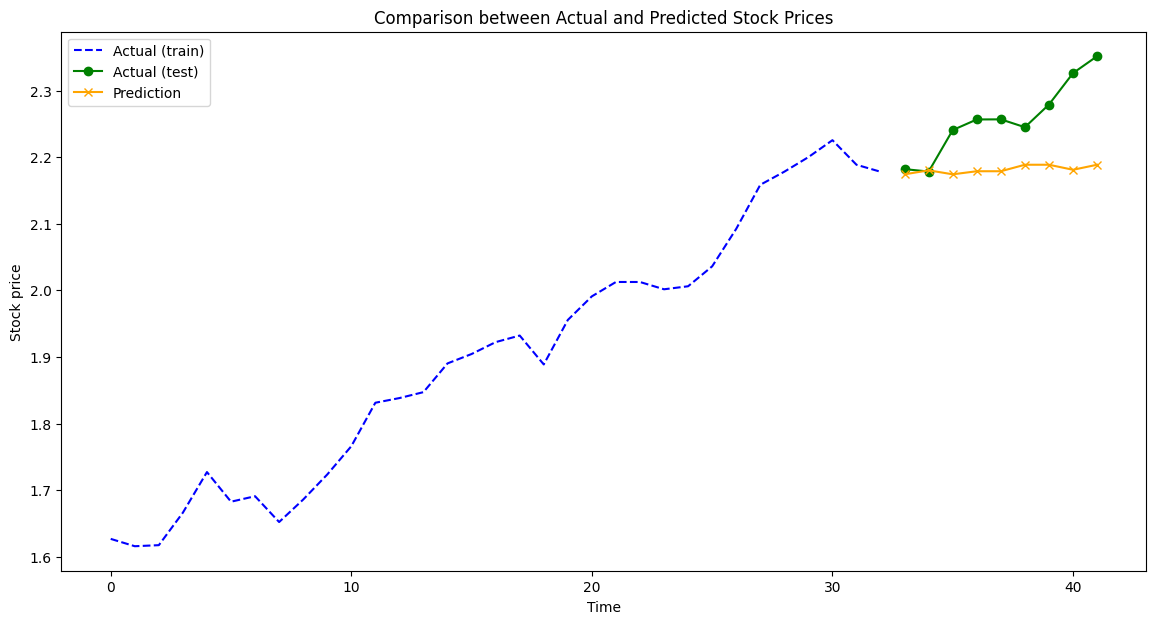

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(train_df['Actual (train)'], label='Actual (train)', color='blue', linestyle='--')
plt.plot(comparison_df['Actual (test)'], label='Actual (test)', color='green', marker='o')
plt.plot(comparison_df['Prediction'], label='Prediction', color='orange', marker='x')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.title('Comparison between Actual and Predicted Stock Prices')
plt.legend()
plt.show()